In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

In [172]:
#Cargar el dataset
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns= housing.feature_names)
Y = pd.Series(housing.target, name="MedHouseVal")

df = pd.concat([Y, X], axis=1)

In [173]:
print(df)

       MedHouseVal  MedInc  HouseAge  AveRooms  AveBedrms  Population  \
0            4.526  8.3252      41.0  6.984127   1.023810       322.0   
1            3.585  8.3014      21.0  6.238137   0.971880      2401.0   
2            3.521  7.2574      52.0  8.288136   1.073446       496.0   
3            3.413  5.6431      52.0  5.817352   1.073059       558.0   
4            3.422  3.8462      52.0  6.281853   1.081081       565.0   
...            ...     ...       ...       ...        ...         ...   
20635        0.781  1.5603      25.0  5.045455   1.133333       845.0   
20636        0.771  2.5568      18.0  6.114035   1.315789       356.0   
20637        0.923  1.7000      17.0  5.205543   1.120092      1007.0   
20638        0.847  1.8672      18.0  5.329513   1.171920       741.0   
20639        0.894  2.3886      16.0  5.254717   1.162264      1387.0   

       AveOccup  Latitude  Longitude  
0      2.555556     37.88    -122.23  
1      2.109842     37.86    -122.22  
2     

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 non-null  float64
 3   AveRooms     20640 non-null  float64
 4   AveBedrms    20640 non-null  float64
 5   Population   20640 non-null  float64
 6   AveOccup     20640 non-null  float64
 7   Latitude     20640 non-null  float64
 8   Longitude    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [175]:
df.describe()


,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train:{X_train.shape}")
print(f"X_train:{X_train.shape}\n")
print(f"X_test :{X_test.shape}\n")

print(f"Y_train:{Y_train.shape}")
print(f"Y_test :{Y_test.shape}")

X_train:(16512, 8)
X_train:(16512, 8)

X_test :(4128, 8)

Y_train:(16512,)
Y_test :(4128,)


In [177]:
#Estandarizamos las features porque cada una esta en unidades distintas.
scaler = StandardScaler()

# Estadarizamos el set de datos de entrenamiendo
# Aqui se calcula la media y el desv_std y se estandarizan los datos
# Xi = Xi - Xmed / desv_std
# Finalmente se obtienen los datos de entrenamiento escalados.
X_train_scaled = scaler.fit_transform(X_train)
print(f"Datos de entrenamiento estandarizados: \n{X_train_scaled}")

# Escalamos los datos de prueba con los valores que fueron
# escalados los datos de entrenamiento para que ambos esten en la misma escala.
# Ya que el modelo entrenado espera features en la escala del train, no del test.
# scaler.transform aplica la misma regla de escalado aprendida en el fit_transform(...)
X_test_scaled = scaler.transform(X_test)


Datos de entrenamiento estandarizados: 
[[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]


In [178]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

verify_df = pd.DataFrame(
    {
        "Real": Y_test.values[:20],
        "Prediction": Y_pred[:20]
    }
)

print(verify_df)


       Real  Prediction
0   0.47700    0.719123
1   0.45800    1.764017
2   5.00001    2.709659
3   2.18600    2.838926
4   2.78000    2.604657
5   1.58700    2.011754
6   1.98200    2.645500
7   1.57500    2.168755
8   3.40000    2.740746
9   4.46600    3.915615
10  1.23200    0.938962
11  2.53900    1.901222
12  2.15100    1.758712
13  2.20500    2.250160
14  2.19800    2.540870
15  1.36200    1.917405
16  1.78400    2.386483
17  1.87500    2.010930
18  1.39800    2.227409
19  1.37500    1.118532


**Coeficiente de determinacion R^2**

R^2: mide que tan bien el modelo explica la variabilidad de los datos reales **Y** usando las variables predictoras **X** 

Variabilidad de Y: que tanto varian los valores reales de la variable objetivo.

* 𝑅^2 = 1 → el modelo predice perfecto (todas las predicciones coinciden con los valores reales).
 
* 𝑅^2 =0 → el modelo no explica nada, es igual de malo que predecir siempre el promedio de Y.
 
* 𝑅^2 < 0 → el modelo es peor que simplemente usar el promedio

R^2 indica cuanta informacion de Y se logras explicar gracias a las features X.

**RMSE**

Da una medida promedio de la magnitud del error de prediccion, expresada en la misma escala que la variable objetivo. 

Nos indica que tan lejos estamos del valor real

**MAE**

Promedio del valor absoluto de los errores. 

Es mas robusto que el RMSE frente a outliers

In [179]:

r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R^2: {r2*100:.2f} %")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R^2: 57.58 %
RMSE: 0.75
MAE: 0.53


In [180]:
# PCA: que explique al menos el %95 de la varianza
pca = PCA(n_components=0.95)

#pca.fit_transform(x) : aplica el algoritmo PCA y me devuelve 
#los datos de entrenamiento proyectados sobre los nuevas direc principales (CP)
x_train_pca = pca.fit_transform(X_train_scaled)

# Proyecta los datos del test en las CP
# De esta forma datos de train y test estan en el mismo espacio.
x_test_pca = pca.transform(X_test_scaled)

print(f"{x_train_pca.shape}")



(16512, 6)


In [181]:
model_pca = LinearRegression()

model_pca.fit(x_train_pca, Y_train)

y_pred_pca = model_pca.predict(x_test_pca)

verify_pca_df = pd.DataFrame(
    {
        "Real": Y_test.values[:20],
        "Predic": y_pred_pca[:20] 
    }
)
print(verify_pca_df)

       Real    Predic
0   0.47700  1.058122
1   0.45800  1.535461
2   5.00001  2.195082
3   2.18600  2.699974
4   2.78000  2.132897
5   1.58700  2.176459
6   1.98200  2.754715
7   1.57500  2.190279
8   3.40000  1.846714
9   4.46600  4.183650
10  1.23200  1.404907
11  2.53900  1.818187
12  2.15100  1.572716
13  2.20500  1.714303
14  2.19800  2.785174
15  1.36200  2.094003
16  1.78400  2.262224
17  1.87500  2.035681
18  1.39800  2.255290
19  1.37500  1.323993


In [182]:
r2_pca = r2_score(Y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(Y_test, y_pred_pca))
mae_pca = mean_absolute_error(Y_test, y_pred_pca)

Varianza explicada:[0.25313826 0.23403182 0.15917174 0.12976895 0.12547205 0.08216517]


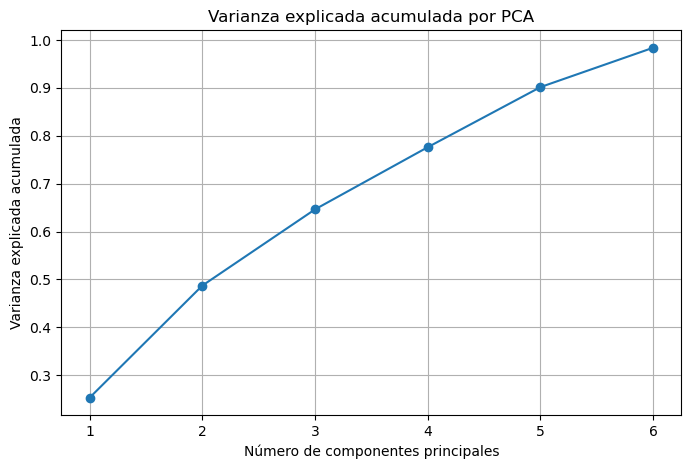

In [183]:
#varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print(f"Varianza explicada:{varianza_explicada}")
#varianza acumulada:
varianza_acumulada = varianza_explicada.cumsum()

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada acumulada por PCA")
plt.grid(True)
plt.show()


In [185]:
print("Antes de PCA:")
print(f"\tR^2: {r2*100:.2f} %")
print(f"\tRMSE: {rmse:.2f}")
print(f"\tMAE: {mae:.2f}\n")

print("Despues de PCA:")
print(f"\tR^2: {r2_pca*100:.2f} %")
print(f"\tRMSE: {rmse_pca:.2f}")
print(f"\tMAE: {mae_pca:.2f}")



Antes de PCA:
	R^2: 57.58 %
	RMSE: 0.75
	MAE: 0.53

Despues de PCA:
	R^2: 48.77 %
	RMSE: 0.82
	MAE: 0.61


**Conclusion** 

* El algoritmo PCA reduce dimensionalidad, es decir, hace al medelo mas simple, rapido y evita la redundancia.
* Pero tambien descarta informacion, en este caso, las metricas son peores que sin PCA.
* Hay que tener en cuenta que PCA no siempre mejora el desempeño(explicar variabilidad de los datos), si no que su ventaja esta en la simplificacion, eliminacion de ruido y visualizacion.

Entonces, la regresion lineal sin PCA predice mejor porque utiliza toda la informacion disponible.

La regresion lineal con PCA, aunque  conserva el 95% de la varianza, reduce la capacidad predictiva del modelo, porque ese 5% descartado tambien ayuda a explicar el target Y(precio promedio).

Sin embargo PCA es util cuando necesitamos un modelo mas compacto y util en contextos donde queremos menos variables. menos ruido o mejor viasualizacion.
